In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import pandas as pd
import cmath as cm

In [2]:
#Parameters
freq=50.5e3;
fs1=100e3;
fs2=100e3;
phase=0.9999*np.pi;
Amp1=1;
Amp2=1;
noise_power=1e-12*fs1/2

In [3]:
#interleaving signal with two ADC
N=10000;
t1=np.arange(0,N/freq,1/fs1)
t2=np.arange((1/(2*fs1))*phase/np.pi,(1/(2*fs1))*phase/np.pi+N/freq,1/fs2)
te=np.arange(0,N/freq,1/(2*fs1))

#signal sampling
s1=Amp1*np.sin(2*np.pi*t1*freq)#+Amp1*np.sin(2*2*np.pi*t1*freq);
s2=Amp2*np.sin(2*np.pi*t2*freq)#+Amp2*np.sin(2*2*np.pi*t2*freq);
st=np.empty((s1.size + s2.size,), dtype=s1.dtype)
st[0::2] = s1
st[1::2] = s2
st+=np.random.normal(scale=np.sqrt(noise_power), size=st.shape)
st=st[0:len(te)]

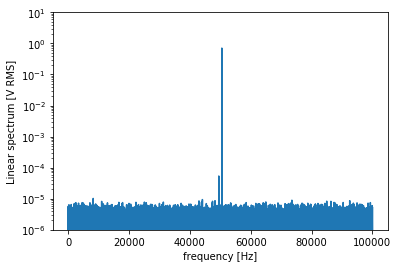

In [4]:
f, Pxx_spec = signal.periodogram(st, 2*fs1, 'flattop', scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.ylim([1e-6, 1e1])
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()

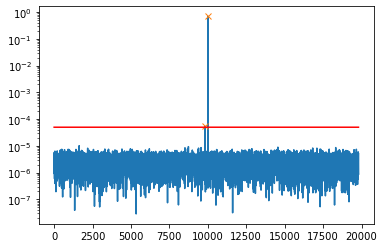

94.80763103856832


In [5]:
d=np.sqrt(Pxx_spec);
peaks, _=signal.find_peaks(d, height=0.5e-4)
plt.semilogy(d)
plt.semilogy(peaks,d[peaks], "x")
plt.semilogy(0.5e-4*np.ones_like(d),'r')
plt.show()
print(10*np.log(d[peaks][1]/d[peaks][0]))

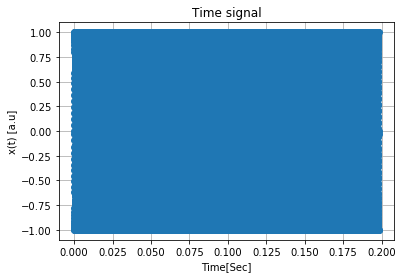

In [6]:
#Ploting s21

fig, ax = plt.subplots()
ax.plot(te,st,'r',te,st,'o')

ax.set(xlabel='Time[Sec]', ylabel='x(t) [a.u]',
       title='Time signal')
ax.grid()

fig.savefig("Time_domanin_Signal.pdf")
plt.show()

In [7]:
te[1:3]

array([5.e-06, 1.e-05])

In [8]:
t1[1:3]

array([1.e-05, 2.e-05])

In [9]:
t2[1:3]

array([1.49995e-05, 2.49995e-05])

In [10]:
Pxx_spec.max()

0.499999060482608